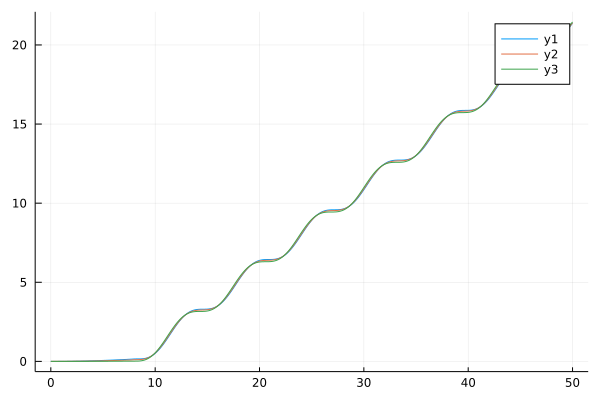

In [26]:
# Two versions of the leapfrog method is used to solve a system consisting of
# a spring attached to a"wall" moving at velocity v. A mass m is attached to 
# the other end of the spring. The mass experiences friction as it moves (it
# sits on a surface) and there is a rest friction as well that has to be overcome
# in order for the mass to move at all.

# The function accel() adds up all forces and returns the acceleration
# There is a small inperfection in how the frictional force ffri is treated:
# - initially when the mass is at rest, sign(v)=0 and there will be no friction
# - at the fillowing step, the mass has velocity > 0, and ffri < 0
# - the small v > 0 of the first step will the n rapidly decrease
# - in some cases, a small negative velocity may result from the discretization
#    - but then the frictional force will be > 0 and again act to impede the motion
# The result of the imperfection is that the mass initially, when it should
#   really stay at rest, has some very low, in some case oscillating, velocity
# The behavior is "self correcting", diminishing when dt is decreased
# - because of the self-correction there is no need to treat v=0 as a special case

# The spring has native (relaxed) length lspr and can be elongated without bounds
#   and compressed to length 0. The final compression force is divergent to avoid the
#   spring length becoming negative (in principle a max length should also be imposed)
# The friction force if fr0 at rest, decays rapidly to fr1 as v increases

 function accel(x,v,t,mass,kspr,lspr,xspr,kwall,fr0,fr1)
    fspr=(xspr-x-lspr)*kspr-kwall/abs(xspr-x)^6      # force from spring
    ffri=fr1+(fr0-fr1) # *exp(-abs(v)*10)                # friction force magnitude
    ffri=-ffri*sign(v)                               # sign of friction depends on velocity
    return (fspr+ffri)/mass
 end

# The function integrate1() carries out nt spes of the standard leapfrog algorithm
# Results are written to the file "x.dat" every wt steps and is also pushed to vectors
# The step error is not very good with the leapfrog method in the presence of friction
# - good results can still be obtained quickly with reasonable dt values

 function integrate1(dt,wt,nt,mass,kspr,lspr,vspr,kwall,fr0,fr1)
    v=0.
    x=0.
    fi=open("x.dat","w")
    vect=Vector{Float64}()
    vecx=Vector{Float64}()
    vecv=Vector{Float64}()
    vecl=Vector{Float64}()
    for i=0:nt
        t=i*dt        
        xspr=lspr+t*vspr 
        if mod(i,wt)==0
           println(fi,t,"  ",x,"  ",xspr-x,"  ",v)           
           push!(vect,t)
           push!(vecx,x)
           push!(vecv,v)
           push!(vecl,xspr-x)
        end
        v=v+dt*accel(x,v,t,mass,kspr,lspr,xspr,kwall,fr0,fr1)
        x=x+dt*v        
    end
    close(fi)
    return vect,vecx,vecv,vecl
 end

# The function integrate2() carries out nt steps of the leapfrog algorithm with
# correction steps to better treat the damping. Otherwise same as integrate1()

 function integrate2(dt,wt,nt,mass,kspr,lspr,vspr,kwall,fr0,fr1)
    v=0.
    x=0.
    x1=0.
    fi=open("x.dat","w")
    vect=Vector{Float64}()
    vecx=Vector{Float64}()
    vecv=Vector{Float64}()
    vecl=Vector{Float64}()
    for i=0:nt
        t=i*dt        
        xspr=lspr+t*vspr 
        if mod(i,wt)==0
           println(fi,t,"  ",x,"  ",xspr-x,"  ",v)           
           push!(vect,t)
           push!(vecx,x)
           push!(vecv,v)
           push!(vecl,xspr-x)
        end
        u=v+0.5*dt*accel(x,v,t,mass,kspr,lspr,xspr,kwall,fr0,fr1)
        y=x+dt*u         # intermediate position
        u=0.5*(y-x1)/dt  # intermediate velocity, x1 is x_{n-1}
        v=v+dt*accel(x,u,t,mass,kspr,lspr,xspr,kwall,fr0,fr1)
        x1=x             # saving what will be x_{n-1} in the next step
        x=x+dt*v                
    end
    close(fi)
    return vect,vecx,vecv,vecl
 end

# Setting parameters related to the leapfrog loop
 dt=0.01        # time step
 wt=10         # write to file every wt step
 nt=5000        # number of time steps

# Setting parameters related to the system 
# - mass connected to spring, the end of which is connected to a moving wall

 mass=1.          # block mass
 kspr=1          # spring constant
 lspr=1.          # native spring length
 vspr=0.5         # constant velocity of spring end (wall); a kind of driving
 kwall=0.0001     # constant in repulsive spring compression force
 fr0=4.           # friction force at rest
 fr1=0.2          # friction force while in motion

# Doing the integration for time step dt and then the same for dt/10,
# plotting t,x,v, or l (the latter being the spring length) after each time.

 t,x,v,l=integrate1(dt,wt,nt,mass,kspr,lspr,vspr,kwall,fr0,fr1)
 
 using Plots

 plot(t,x)

 t,x,v,l=integrate2(dt,wt,nt,mass,kspr,lspr,vspr,kwall,fr0,fr1)

 plot!(t,x)

 dt=dt/10
 wt=wt*10
 nt=nt*10

 t,x,v,l=integrate1(dt,wt,nt,mass,kspr,lspr,vspr,kwall,fr0,fr1)

 plot!(t,x)

